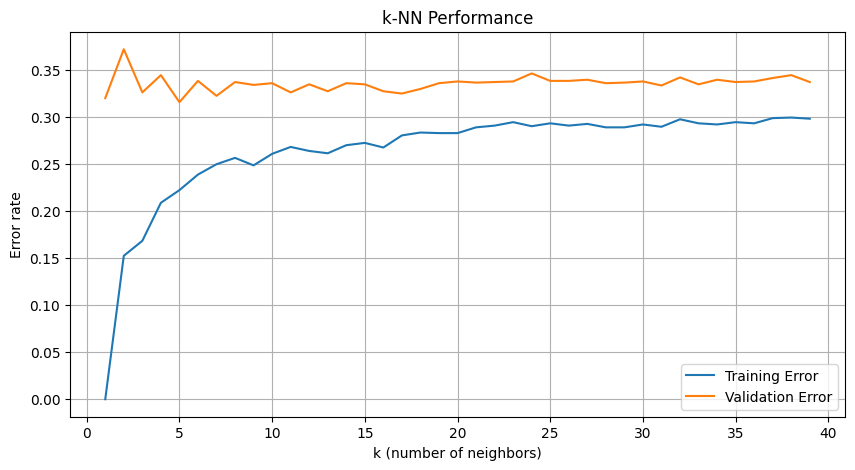

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Load data
link = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(link, delimiter=";")

# Prepare data
X = df.drop("quality", axis=1)
Y = np.array([0 if q <= 5 else 1 for q in df["quality"]])

# Split
Xa, Xt, Ya, Yt = train_test_split(X, Y, test_size=1/3, stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, test_size=0.5, stratify=Ya)

# K values
k_vector = np.arange(1, 40)
error_train = np.zeros(len(k_vector))
error_val = np.zeros(len(k_vector))

# Loop
for i, k in enumerate(k_vector):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa, Ya)

    error_train[i] = 1 - accuracy_score(Ya, clf.predict(Xa))
    error_val[i] = 1 - accuracy_score(Yv, clf.predict(Xv))

# Plot
plt.figure(figsize=(10,5))
plt.plot(k_vector, error_train, label="Training Error")
plt.plot(k_vector, error_val, label="Validation Error")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Error rate")
plt.title("k-NN Performance")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
 X = df.drop("quality", axis=1) #we drop the column "quality"
 Y = df["quality"]
 print("\n========= Wine Qualities ========= \n")
 print(Y.value_counts())


========= Wine Qualities ========= 

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [16]:
 # bad wine (y=0) : quality <= 5 and good quality (y= 1) otherwise
 Y = [0 if val <=5 else 1 for val in Y]

/tmp/ipython-input-1712478130.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


<Axes: >

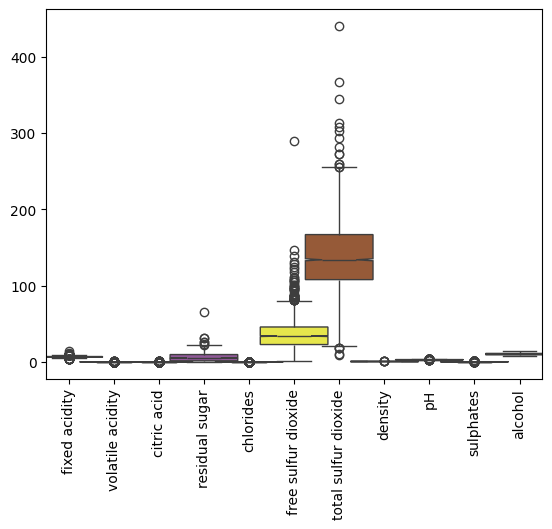

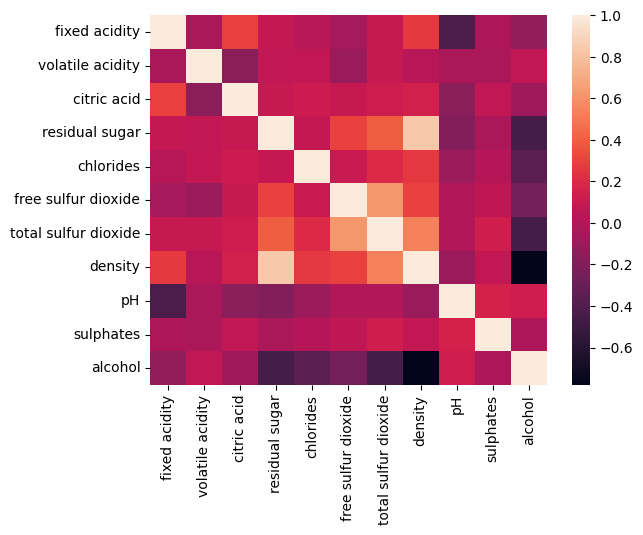

In [19]:
 import matplotlib.pyplot as plt
 import seaborn as sns
 plt.figure()
 ax = plt.gca()
 sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
 ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
 plt.figure()
 corr = X.corr()
 sns.heatmap(corr)

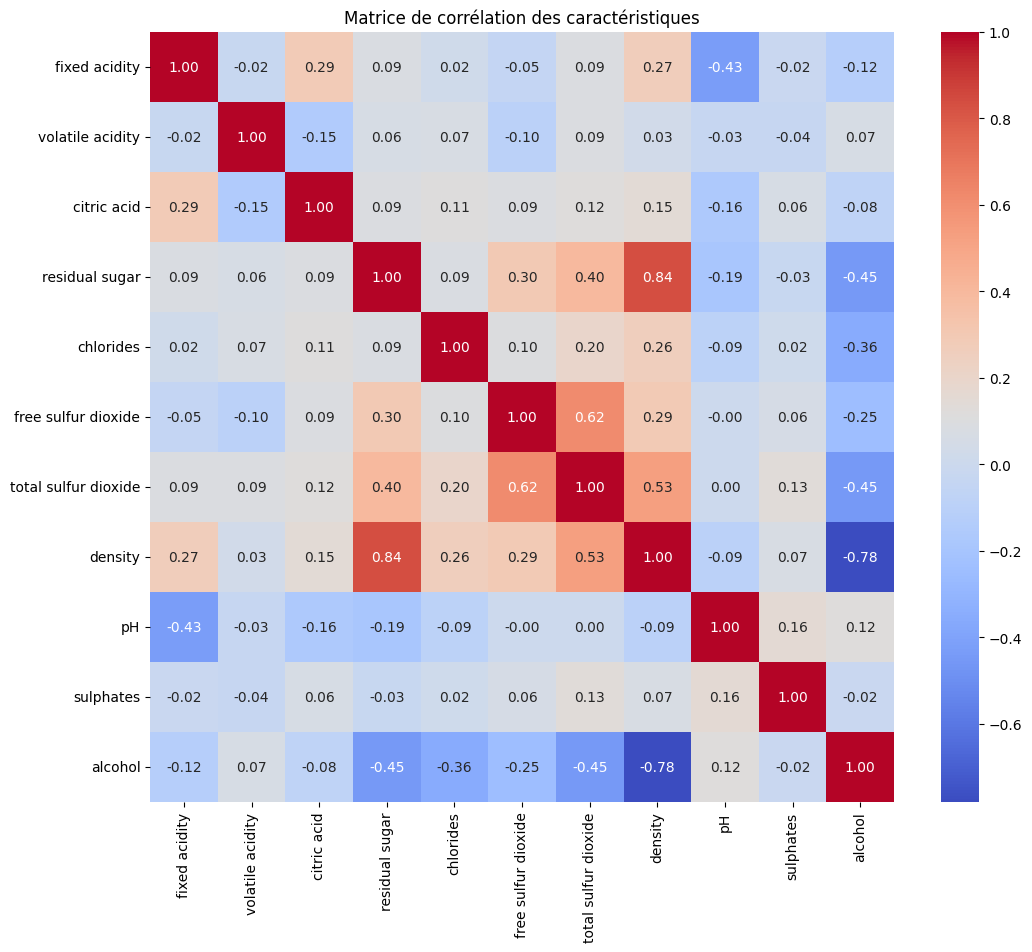

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation des caractéristiques")
plt.show()